In [1]:
import numpy as np
import os
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import tarfile
import zipfile
from  sklearn.linear_model import LogisticRegression
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_extraction.text import CountVectorizer
from  sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
from urllib.request import urlretrieve
from os.path import isfile, isdir
import plotly.figure_factory as ff
import plotly.express as px
import statsmodels.api as sm
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from numpy import loadtxt
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from tensorflow.keras.layers import BatchNormalization
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.datasets import imdb
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
%matplotlib inline
import unidecode
import re
import seaborn as sns
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import nltk
nltk.download('stopwords')
from sklearn.ensemble import RandomForestClassifier

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MELASNIE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df_train = pd.read_csv("./data/train.csv")
df_test = pd.read_csv("./data/test.csv")
df_train_test = pd.concat([df_train,df_test])
indexTest = df_test['index']
category = df_train['categoria']

In [3]:
df_train_test.head(15)

,index,titulo,categoria
0,610,"""De nada sirven los triunfos si la paz no los ...",Película y Animación
1,819,"""Hay mejores formas para uno mostrar su forma ...",Película y Animación
2,637,#LosNacionalesXSeñal - Bahía Cupica,Deportes
3,740,#LosNacionalesXSeñal - Estudiantes Utech balon...,Deportes
4,160,#LosNacionalesXSeñal - Las pruebas de triatlón...,Deportes
5,101,"#LosNacionalesXSeñal - María Elena Hurtado, la...",Deportes
6,405,#LosNacionalesXSeñal - Niños voley playa,Deportes
7,681,#LosNacionalesXSeñal - ¡Hicimos historia!,Deportes
8,428,#PedaleoPor: Ariel Molina envía un saludo a lo...,Deportes
9,13,#PedaleoPor: Ariel Molina envía un saludo a lo...,Deportes


In [4]:
df_train_test['titulo'] = df_train_test['titulo'].str.lower() 

In [5]:
df_train_test["titulo"]

0      "de nada sirven los triunfos si la paz no los ...
1      "hay mejores formas para uno mostrar su forma ...
2                    #losnacionalesxseñal - bahía cupica
3      #losnacionalesxseñal - estudiantes utech balon...
4      #losnacionalesxseñal - las pruebas de triatlón...
                             ...                        
195              ¿cómo enseñarle a los papás a reciclar?
196    ¿cómo es tu municipio? los niños de paicol nos...
197                 ¿los niños podemos cambiar el mundo?
198                  ¿qué harías tú? - una niña ejemplar
199    ¿qué te gusta de mi señal? los niños nos dan s...
Name: titulo, Length: 1000, dtype: object

In [6]:
df_train_test["titulo"] = df_train_test["titulo"].apply(unidecode.unidecode)

In [7]:
df_train_test["titulo"]

0      "de nada sirven los triunfos si la paz no los ...
1      "hay mejores formas para uno mostrar su forma ...
2                    #losnacionalesxsenal - bahia cupica
3      #losnacionalesxsenal - estudiantes utech balon...
4      #losnacionalesxsenal - las pruebas de triatlon...
                             ...                        
195              ?como ensenarle a los papas a reciclar?
196    ?como es tu municipio? los ninos de paicol nos...
197                 ?los ninos podemos cambiar el mundo?
198                  ?que harias tu? - una nina ejemplar
199    ?que te gusta de mi senal? los ninos nos dan s...
Name: titulo, Length: 1000, dtype: object

In [8]:
def specialcaracters(text):
    return re.sub(r'[^A-Za-z0-9 ]+', '', text)

In [9]:
df_train_test["titulo"] = df_train_test["titulo"].apply(specialcaracters)

In [10]:
df_train_test["titulo"].head(10)

0    de nada sirven los triunfos si la paz no los c...
1    hay mejores formas para uno mostrar su forma d...
2                    losnacionalesxsenal  bahia cupica
3     losnacionalesxsenal  estudiantes utech balonmano
4    losnacionalesxsenal  las pruebas de triatlon l...
5    losnacionalesxsenal  maria elena hurtado la pe...
6               losnacionalesxsenal  ninos voley playa
7                losnacionalesxsenal  hicimos historia
8    pedaleopor ariel molina envia un saludo a los ...
9    pedaleopor ariel molina envia un saludo a los ...
Name: titulo, dtype: object

In [11]:
def separarPalabras(text, dictionary):
    words = re.findall(r'\b\w+\b', text)
    for word in words:
            dictionary[word] = 0
palabrasSeparadas = {}

In [12]:
df_train_test["titulo"].apply(lambda x: separarPalabras(x, palabrasSeparadas))
df_palabrasSeparadas = pd.DataFrame(palabrasSeparadas.keys(), columns=["Palabra"])

In [13]:
palabrasSeparadas

{'de': 0,
 'nada': 0,
 'sirven': 0,
 'los': 0,
 'triunfos': 0,
 'si': 0,
 'la': 0,
 'paz': 0,
 'no': 0,
 'corona': 0,
 'lapazhabla': 0,
 'hay': 0,
 'mejores': 0,
 'formas': 0,
 'para': 0,
 'uno': 0,
 'mostrar': 0,
 'su': 0,
 'forma': 0,
 'pensar': 0,
 'sofia': 0,
 'losnacionalesxsenal': 0,
 'bahia': 0,
 'cupica': 0,
 'estudiantes': 0,
 'utech': 0,
 'balonmano': 0,
 'las': 0,
 'pruebas': 0,
 'triatlon': 0,
 'llenaron': 0,
 'emocion': 0,
 'al': 0,
 'municipio': 0,
 'prado': 0,
 'maria': 0,
 'elena': 0,
 'hurtado': 0,
 'pele': 0,
 'antioquena': 0,
 'ninos': 0,
 'voley': 0,
 'playa': 0,
 'hicimos': 0,
 'historia': 0,
 'pedaleopor': 0,
 'ariel': 0,
 'molina': 0,
 'envia': 0,
 'un': 0,
 'saludo': 0,
 'a': 0,
 'escarabajos': 0,
 'dagoberto': 0,
 'lopez': 0,
 'esteban': 0,
 'kekessy': 0,
 'henry': 0,
 'garcia': 0,
 'james': 0,
 'guevara': 0,
 'javier': 0,
 'cruz': 0,
 'rodriguez': 0,
 'jonathan': 0,
 'devia': 0,
 'jorge': 0,
 'merchan': 0,
 'luz': 0,
 'mery': 0,
 'paez': 0,
 'mayra': 0,
 'loza

In [14]:
df_frecuencia = pd.DataFrame(palabrasSeparadas, index = df_train_test["titulo"])
df_frecuencia

,de,nada,sirven,los,triunfos,si,la,paz,no,corona,lapazhabla,hay,mejores,formas,para,uno,mostrar,su,forma,pensar,sofia,losnacionalesxsenal,bahia,cupica,estudiantes,utech,balonmano,las,pruebas,triatlon,llenaron,emocion,al,municipio,prado,maria,elena,hurtado,pele,antioquena,ninos,voley,playa,hicimos,historia,pedaleopor,ariel,molina,envia,un,saludo,a,escarabajos,dagoberto,lopez,esteban,kekessy,henry,garcia,james,guevara,javier,cruz,rodriguez,jonathan,devia,jorge,merchan,luz,mery,paez,mayra,lozano,patricia,ricardo,ramirez,votocriollo,el,chontaduro,sillas,criollas,oficios,parque,03,infografia,infantil,huella,energetica,1,6,cine,jovenmpg,cirugia,estetica,acceso,directompg,musica,fusion,transgeneristas,1280,almas,soledad,criminal,senal,radionica,1deg,conversatorio,todo,lo,que,somos,rompiendo,fronteras,2,reinsertados,sida,directo,hora,del,patrimonio,25,agosto,automovilismo,atletismo,3,legado,jaime,r,echavarria,migracion,4,5,cosas,debes,saber,sobre,boxeo,paranormal,7,radio,nacional,70,anos,diferencias,entre,ciclismo,femenino,y,masculino,razones,ver,tour,l,avenir,daniel,martinez,abril,es,mes,palabra,en,senalcolombia,actividad,liga,animacion,mi,aislados,cancion,peroleta,tumaco,juana,carmela,berrio,santa,islote,postal,luna,nuqui,noche,nazareth,ganador,india,catalina,mejor,fotografia,paso,garzon,vimos,alerta,kamarada,legal,altimetrias,etapa,12,francia,2015,ana,mercedes,hoyos,colombia,andres,salcedo,senaldeportes,con,dia,futbol,murio,anthonya,antonia,regueton,anton,tiruriru,villancicos,tipicos,colombianos,anonimas,extraordinarias,maura,caldas,aguila,tway,aqui,se,nace,documental,armero,arena,miranda,baile,silla,ruedas,art,of,motion,santorini,asi,calientan,hinchas,maracana,celebran,goles,chilenos,deportes,fue,nuestra,visita,fundacion,cardioinfantil,preparan,musicos,...,palomitas,resquicio,alfonso,acosta,boyita,solomonoff,peseta,1100,perdita,durango,1997,triangulo,1984,novia,errante,chaplin,recordamos,hazana,gutierrez,orbita,aterciopelados,enciende,sentido,comun,bogotazo,tomblaine,mauselaine,voz,capella,anfitrion,esplendido,fallo,increiblemente,lara,st,atollado,capacita,archivo,icono,consentida,seul,infamia,torneos,mismo,gol,neymar,frente,camerun,gracias,show,perico,grandes,misterios,universo,morgan,freeman,sabados,domingos,sorpresa,abuela,central,girardot,ingredientes,empanadas,hermanas,cardenas,celedon,senor,sin,perdon,coyote,codigo,policia,maldita,vanidad,electronica,ritos,sociales,inspiracion,tara,dance,academy,martha,bello,coleccionismo,gallego,fueron,estan,nosotros,hemos,recorrido,skaters,tunal,viaje,humedal,cultivo,49,balanza,casera,volar,pico,hongos,navia,hizo,descubrir,busca,nuevos,talentos,sofa,guante,parlante,carnavalito,mirar,tele,belgica,kenia,portugal,fuchi,burgos,situacion,pesca,paciente,rios,rastro,purpura,pasos,sueno,bolivariano,plaza,bala,victoria,metros,planos,sonido,urbano,estrenos,region,fragmentacion,bolanos,chespirito,1929,conchar,sobrevivir,sd,digital,sus,impresiones,estalla,teatro,evolucion,nutricion,ciclistas,redes,sobreviviencia,importar,condicion,tenemos,informacion,soacha,i,sopo,galeano,lenguas,podridas,originalidad,paseos,doctor,krapula,lastime,130,antena,132,marin,138,yamile,144,149,158,lizarazo,164,185,187,angela,223,licitacion,wiessnerwmv,238,libia,carrillo,245,sophie,272,rocha,274,cubillos,cesar,309,2016,silva,358,tatiana,forero,canon,366,375,391,397,raul,amortegui,403,astroz,460,saida,prieto,51,55,80,83,duberney,galvis,87,rene,vaca,cardozo,respuestas,giro,italia,herlys,2018,discriminacion,argentina,rigo,hablando,lenguaje,vinasco,ch,recuerda,90,marta,viajando,ensenarle,papas,reciclar,paicol,cuentan,podemos,cambiar,ejemplar,dan,opinion
titulo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [15]:
df_frecuencia.columns

Index(['de', 'nada', 'sirven', 'los', 'triunfos', 'si', 'la', 'paz', 'no',
       'corona',
       ...
       'ensenarle', 'papas', 'reciclar', 'paicol', 'cuentan', 'podemos',
       'cambiar', 'ejemplar', 'dan', 'opinion'],
      dtype='object', length=2109)

In [16]:
for indice, row in df_frecuencia.iterrows():
    for word in df_frecuencia.columns:
        title = row.name
        df_frecuencia.at[row.name,word] = title.split().count(word)

In [17]:
df_frecuencia

,de,nada,sirven,los,triunfos,si,la,paz,no,corona,lapazhabla,hay,mejores,formas,para,uno,mostrar,su,forma,pensar,sofia,losnacionalesxsenal,bahia,cupica,estudiantes,utech,balonmano,las,pruebas,triatlon,llenaron,emocion,al,municipio,prado,maria,elena,hurtado,pele,antioquena,ninos,voley,playa,hicimos,historia,pedaleopor,ariel,molina,envia,un,saludo,a,escarabajos,dagoberto,lopez,esteban,kekessy,henry,garcia,james,guevara,javier,cruz,rodriguez,jonathan,devia,jorge,merchan,luz,mery,paez,mayra,lozano,patricia,ricardo,ramirez,votocriollo,el,chontaduro,sillas,criollas,oficios,parque,03,infografia,infantil,huella,energetica,1,6,cine,jovenmpg,cirugia,estetica,acceso,directompg,musica,fusion,transgeneristas,1280,almas,soledad,criminal,senal,radionica,1deg,conversatorio,todo,lo,que,somos,rompiendo,fronteras,2,reinsertados,sida,directo,hora,del,patrimonio,25,agosto,automovilismo,atletismo,3,legado,jaime,r,echavarria,migracion,4,5,cosas,debes,saber,sobre,boxeo,paranormal,7,radio,nacional,70,anos,diferencias,entre,ciclismo,femenino,y,masculino,razones,ver,tour,l,avenir,daniel,martinez,abril,es,mes,palabra,en,senalcolombia,actividad,liga,animacion,mi,aislados,cancion,peroleta,tumaco,juana,carmela,berrio,santa,islote,postal,luna,nuqui,noche,nazareth,ganador,india,catalina,mejor,fotografia,paso,garzon,vimos,alerta,kamarada,legal,altimetrias,etapa,12,francia,2015,ana,mercedes,hoyos,colombia,andres,salcedo,senaldeportes,con,dia,futbol,murio,anthonya,antonia,regueton,anton,tiruriru,villancicos,tipicos,colombianos,anonimas,extraordinarias,maura,caldas,aguila,tway,aqui,se,nace,documental,armero,arena,miranda,baile,silla,ruedas,art,of,motion,santorini,asi,calientan,hinchas,maracana,celebran,goles,chilenos,deportes,fue,nuestra,visita,fundacion,cardioinfantil,preparan,musicos,...,palomitas,resquicio,alfonso,acosta,boyita,solomonoff,peseta,1100,perdita,durango,1997,triangulo,1984,novia,errante,chaplin,recordamos,hazana,gutierrez,orbita,aterciopelados,enciende,sentido,comun,bogotazo,tomblaine,mauselaine,voz,capella,anfitrion,esplendido,fallo,increiblemente,lara,st,atollado,capacita,archivo,icono,consentida,seul,infamia,torneos,mismo,gol,neymar,frente,camerun,gracias,show,perico,grandes,misterios,universo,morgan,freeman,sabados,domingos,sorpresa,abuela,central,girardot,ingredientes,empanadas,hermanas,cardenas,celedon,senor,sin,perdon,coyote,codigo,policia,maldita,vanidad,electronica,ritos,sociales,inspiracion,tara,dance,academy,martha,bello,coleccionismo,gallego,fueron,estan,nosotros,hemos,recorrido,skaters,tunal,viaje,humedal,cultivo,49,balanza,casera,volar,pico,hongos,navia,hizo,descubrir,busca,nuevos,talentos,sofa,guante,parlante,carnavalito,mirar,tele,belgica,kenia,portugal,fuchi,burgos,situacion,pesca,paciente,rios,rastro,purpura,pasos,sueno,bolivariano,plaza,bala,victoria,metros,planos,sonido,urbano,estrenos,region,fragmentacion,bolanos,chespirito,1929,conchar,sobrevivir,sd,digital,sus,impresiones,estalla,teatro,evolucion,nutricion,ciclistas,redes,sobreviviencia,importar,condicion,tenemos,informacion,soacha,i,sopo,galeano,lenguas,podridas,originalidad,paseos,doctor,krapula,lastime,130,antena,132,marin,138,yamile,144,149,158,lizarazo,164,185,187,angela,223,licitacion,wiessnerwmv,238,libia,carrillo,245,sophie,272,rocha,274,cubillos,cesar,309,2016,silva,358,tatiana,forero,canon,366,375,391,397,raul,amortegui,403,astroz,460,saida,prieto,51,55,80,83,duberney,galvis,87,rene,vaca,cardozo,respuestas,giro,italia,herlys,2018,discriminacion,argentina,rigo,hablando,lenguaje,vinasco,ch,recuerda,90,marta,viajando,ensenarle,papas,reciclar,paicol,cuentan,podemos,cambiar,ejemplar,dan,opinion
titulo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [18]:
stop_words = set(stopwords.words('spanish'))
def removePrepotition(text):
    remove = SnowballStemmer("spanish")
    tokenizers = ToktokTokenizer()
    token = tokenizers.tokenize(text)
    token = [remove.stem(token.strip()) for token in token if token not in stop_words]
    text = " ".join(token)
    return text
df_train_test["titulo"] = df_train_test["titulo"].apply(removePrepotition)

In [19]:
dummies = pd.get_dummies(df_train_test['categoria'], columns=['categoria'], drop_first=True)
dummies.corr()

,Educación,Entretenimiento,Gente y Blogs,Otros,Película y Animación
Educación,1.000000,-0.191214,-0.085276,-0.080146,-0.163248
Entretenimiento,-0.191214,1.000000,-0.127995,-0.120294,-0.245026
Gente y Blogs,-0.085276,-0.127995,1.000000,-0.053648,-0.109275
Otros,-0.080146,-0.120294,-0.053648,1.000000,-0.102700
Película y Animación,-0.163248,-0.245026,-0.109275,-0.102700,1.000000


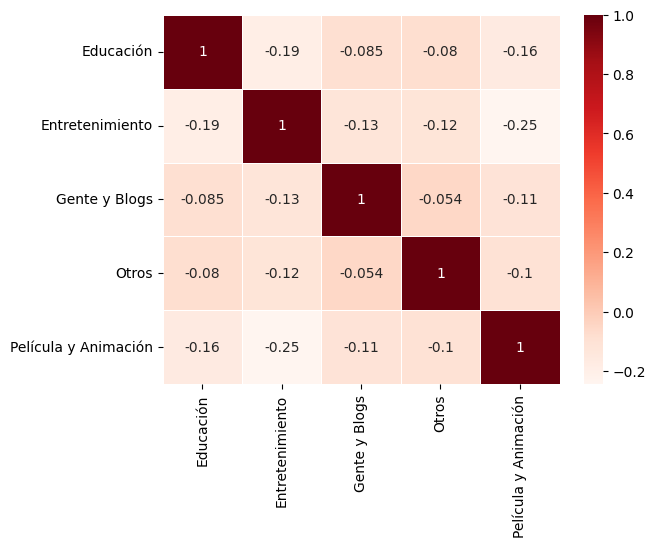

In [20]:
plt.Figure(figsize=(8,6))
sns.heatmap(dummies.corr(),annot=True, cmap='Reds', linewidths=0.5)
plt.show()

In [21]:
palabrasSeparadas = {}

df_train_test["titulo"].apply(lambda x: separarPalabras(x, palabrasSeparadas))

df_palabrasSeparadas = pd.DataFrame(palabrasSeparadas.keys(), columns=["Palabra"])
df_palabrasSeparadas.head(20)

,Palabra
0,sirv
1,triunf
2,si
3,paz
4,coron
5,lapazhabl
6,mejor
7,form
8,mostr
9,pens


In [22]:
len(df_palabrasSeparadas)

1857

In [23]:
matriz_TF = pd.DataFrame(palabrasSeparadas, index=df_train_test["titulo"])
df_frecuencia = pd.DataFrame(palabrasSeparadas, index=df_train_test["titulo"])
matriz_TF

,sirv,triunf,si,paz,coron,lapazhabl,mejor,form,mostr,pens,sofi,losnacionalesxsenal,bahi,cupic,estudi,utech,balonman,prueb,triatlon,llen,emocion,municipi,prad,mari,elen,hurt,pel,antioquen,nin,voley,play,hic,histori,pedaleopor,ariel,molin,envi,salud,escarabaj,dagobert,lopez,esteb,kekessy,henry,garci,jam,guev,javi,cruz,rodriguez,jonath,devi,jorg,merch,luz,mery,paez,mayr,lozan,patrici,ricard,ramirez,votocrioll,chontadur,sill,crioll,ofici,parqu,03,infografi,infantil,huell,energet,1,6,cin,jovenmpg,cirugi,estet,acces,directompg,music,fusion,transgener,1280,almas,soled,criminal,senal,radion,1deg,conversatori,romp,fronter,2,reinsert,sid,direct,hor,patrimoni,25,agost,automovil,atlet,3,leg,jaim,r,echavarri,migracion,4,5,cos,deb,sab,boxe,paranormal,7,radi,nacional,70,anos,diferent,ciclism,femenin,masculin,razon,ver,tour,l,aven,daniel,martinez,abril,mes,palabr,senalcolombi,activ,lig,anim,aisl,cancion,perolet,tumac,juan,carmel,berri,sant,islot,postal,lun,nuqui,noch,nazareth,ganador,indi,catalin,fotografi,pas,garzon,vim,alert,kamar,legal,altimetri,etap,12,franci,2015,ana,merced,hoy,colombi,andres,salced,senaldeport,dia,futbol,muri,anthony,antoni,regueton,anton,tiruriru,villanc,tipic,colombian,anonim,extraordinari,maur,cald,aguil,tway,aqui,nac,documental,armer,aren,mirand,bail,rued,art,of,motion,santorini,asi,calient,hinch,maracan,celebr,gol,chilen,deport,visit,fundacion,cardioinfantil,prep,concurs,band,paip,boyac,avellan,baul,part,bicentenari,memori,revel,agustin,agualong,venezuel,bocadill,velen,brasilandi,favel,invad,pasion,haci,cabezot,vemosmpg,camiset,equip,lottobelis,sojasun,cap,04,guip,guambit,rosali,rein,desiert,...,oquend,john,manjarrez,betancurt,lancher,adult,fosilmpeg4,mor,dign,superdot,guajir,claudi,cabild,indigen,casill,fia,barcelon,lentej,ultra,poder,cole,general,homejaj,sindy,ortiz,petron,andagoy,saij,cuentit,abej,pav,taekwond,espej,rap,wrap,emma,recomiend,bruj,morral,palomit,resquici,alfons,acost,boyit,solomonoff,peset,1100,perdit,durang,1997,triangul,1984,novi,errant,chaplin,record,hazan,gutierrez,orbit,aterciopel,enciend,bogotaz,tomblain,mauselain,voz,capell,esplend,fall,increibl,lar,st,atoll,capacit,archiv,icon,consent,seul,infami,torne,mism,neym,frent,camerun,graci,show,peric,misteri,univers,morg,freem,sorpres,abuel,central,girardot,ingredient,empan,herman,carden,celedon,perdon,coyot,codig,polici,maldit,vanid,electron,rit,social,inspir,tar,danc,academy,marth,coleccion,galleg,estan,recorr,skaters,tunal,humedal,cultiv,49,balanz,vol,pic,hong,navi,hiz,descubr,sof,guant,parlant,carnavalit,tel,belgic,keni,portugal,fuchi,burg,situacion,pesc,pacient,rios,rastr,purpur,plaz,bal,victori,plan,region,bolan,chespirit,1929,conch,sobreviv,sd,digital,impresion,estall,teatr,evolucion,nutricion,ciclist,red,sobrevivient,import,condicion,inform,soach,i,sop,galean,lengu,podr,original,doctor,krapul,lastim,130,anten,132,138,yamil,144,149,158,lizaraz,164,185,187,223,licit,wiessnerwmv,238,libi,carrill,245,sophi,272,roch,274,cubill,309,2016,silv,358,tatian,forer,canon,366,375,391,397,raul,amortegui,403,astroz,460,said,priet,51,55,80,83,duberney,galvis,87,ren,vac,cardoz,respuest,gir,itali,herlys,2018,discrimin,rig,lenguaj,vinasc,ch,recuerd,90,ensen,recicl,paicol,pod,cambi,ejempl,dan,opinion
titulo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
sirv triunf si paz coron lapazhabl,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [24]:
df_frecuencia = df_frecuencia.astype(float)
for indice, row in df_frecuencia.iterrows():
    for word in df_frecuencia.columns:
        title = row.name
        title_vector = title.split()
        df_frecuencia.at[title,word] = title_vector.count(word)
df_frecuencia

,sirv,triunf,si,paz,coron,lapazhabl,mejor,form,mostr,pens,sofi,losnacionalesxsenal,bahi,cupic,estudi,utech,balonman,prueb,triatlon,llen,emocion,municipi,prad,mari,elen,hurt,pel,antioquen,nin,voley,play,hic,histori,pedaleopor,ariel,molin,envi,salud,escarabaj,dagobert,lopez,esteb,kekessy,henry,garci,jam,guev,javi,cruz,rodriguez,jonath,devi,jorg,merch,luz,mery,paez,mayr,lozan,patrici,ricard,ramirez,votocrioll,chontadur,sill,crioll,ofici,parqu,03,infografi,infantil,huell,energet,1,6,cin,jovenmpg,cirugi,estet,acces,directompg,music,fusion,transgener,1280,almas,soled,criminal,senal,radion,1deg,conversatori,romp,fronter,2,reinsert,sid,direct,hor,patrimoni,25,agost,automovil,atlet,3,leg,jaim,r,echavarri,migracion,4,5,cos,deb,sab,boxe,paranormal,7,radi,nacional,70,anos,diferent,ciclism,femenin,masculin,razon,ver,tour,l,aven,daniel,martinez,abril,mes,palabr,senalcolombi,activ,lig,anim,aisl,cancion,perolet,tumac,juan,carmel,berri,sant,islot,postal,lun,nuqui,noch,nazareth,ganador,indi,catalin,fotografi,pas,garzon,vim,alert,kamar,legal,altimetri,etap,12,franci,2015,ana,merced,hoy,colombi,andres,salced,senaldeport,dia,futbol,muri,anthony,antoni,regueton,anton,tiruriru,villanc,tipic,colombian,anonim,extraordinari,maur,cald,aguil,tway,aqui,nac,documental,armer,aren,mirand,bail,rued,art,of,motion,santorini,asi,calient,hinch,maracan,celebr,gol,chilen,deport,visit,fundacion,cardioinfantil,prep,concurs,band,paip,boyac,avellan,baul,part,bicentenari,memori,revel,agustin,agualong,venezuel,bocadill,velen,brasilandi,favel,invad,pasion,haci,cabezot,vemosmpg,camiset,equip,lottobelis,sojasun,cap,04,guip,guambit,rosali,rein,desiert,...,oquend,john,manjarrez,betancurt,lancher,adult,fosilmpeg4,mor,dign,superdot,guajir,claudi,cabild,indigen,casill,fia,barcelon,lentej,ultra,poder,cole,general,homejaj,sindy,ortiz,petron,andagoy,saij,cuentit,abej,pav,taekwond,espej,rap,wrap,emma,recomiend,bruj,morral,palomit,resquici,alfons,acost,boyit,solomonoff,peset,1100,perdit,durang,1997,triangul,1984,novi,errant,chaplin,record,hazan,gutierrez,orbit,aterciopel,enciend,bogotaz,tomblain,mauselain,voz,capell,esplend,fall,increibl,lar,st,atoll,capacit,archiv,icon,consent,seul,infami,torne,mism,neym,frent,camerun,graci,show,peric,misteri,univers,morg,freem,sorpres,abuel,central,girardot,ingredient,empan,herman,carden,celedon,perdon,coyot,codig,polici,maldit,vanid,electron,rit,social,inspir,tar,danc,academy,marth,coleccion,galleg,estan,recorr,skaters,tunal,humedal,cultiv,49,balanz,vol,pic,hong,navi,hiz,descubr,sof,guant,parlant,carnavalit,tel,belgic,keni,portugal,fuchi,burg,situacion,pesc,pacient,rios,rastr,purpur,plaz,bal,victori,plan,region,bolan,chespirit,1929,conch,sobreviv,sd,digital,impresion,estall,teatr,evolucion,nutricion,ciclist,red,sobrevivient,import,condicion,inform,soach,i,sop,galean,lengu,podr,original,doctor,krapul,lastim,130,anten,132,138,yamil,144,149,158,lizaraz,164,185,187,223,licit,wiessnerwmv,238,libi,carrill,245,sophi,272,roch,274,cubill,309,2016,silv,358,tatian,forer,canon,366,375,391,397,raul,amortegui,403,astroz,460,said,priet,51,55,80,83,duberney,galvis,87,ren,vac,cardoz,respuest,gir,itali,herlys,2018,discrimin,rig,lenguaj,vinasc,ch,recuerd,90,ensen,recicl,paicol,pod,cambi,ejempl,dan,opinion
titulo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
sirv triunf si paz coron lapazhabl,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [25]:
matriz_TF = matriz_TF.astype(float)
for indice, row in matriz_TF.iterrows():
    title = row.name
    title_vector = title.split()
    for word in matriz_TF.columns:
        matriz_TF.at[title,word] = (title_vector.count(word))/len(title_vector)
matriz_TF

,sirv,triunf,si,paz,coron,lapazhabl,mejor,form,mostr,pens,sofi,losnacionalesxsenal,bahi,cupic,estudi,utech,balonman,prueb,triatlon,llen,emocion,municipi,prad,mari,elen,hurt,pel,antioquen,nin,voley,play,hic,histori,pedaleopor,ariel,molin,envi,salud,escarabaj,dagobert,lopez,esteb,kekessy,henry,garci,jam,guev,javi,cruz,rodriguez,jonath,devi,jorg,merch,luz,mery,paez,mayr,lozan,patrici,ricard,ramirez,votocrioll,chontadur,sill,crioll,ofici,parqu,03,infografi,infantil,huell,energet,1,6,cin,jovenmpg,cirugi,estet,acces,directompg,music,fusion,transgener,1280,almas,soled,criminal,senal,radion,1deg,conversatori,romp,fronter,2,reinsert,sid,direct,hor,patrimoni,25,agost,automovil,atlet,3,leg,jaim,r,echavarri,migracion,4,5,cos,deb,sab,boxe,paranormal,7,radi,nacional,70,anos,diferent,ciclism,femenin,masculin,razon,ver,tour,l,aven,daniel,martinez,abril,mes,palabr,senalcolombi,activ,lig,anim,aisl,cancion,perolet,tumac,juan,carmel,berri,sant,islot,postal,lun,nuqui,noch,nazareth,ganador,indi,catalin,fotografi,pas,garzon,vim,alert,kamar,legal,altimetri,etap,12,franci,2015,ana,merced,hoy,colombi,andres,salced,senaldeport,dia,futbol,muri,anthony,antoni,regueton,anton,tiruriru,villanc,tipic,colombian,anonim,extraordinari,maur,cald,aguil,tway,aqui,nac,documental,armer,aren,mirand,bail,rued,art,of,motion,santorini,asi,calient,hinch,maracan,celebr,gol,chilen,deport,visit,fundacion,cardioinfantil,prep,concurs,band,paip,boyac,avellan,baul,part,bicentenari,memori,revel,agustin,agualong,venezuel,bocadill,velen,brasilandi,favel,invad,pasion,haci,cabezot,vemosmpg,camiset,equip,lottobelis,sojasun,cap,04,guip,guambit,rosali,rein,desiert,...,oquend,john,manjarrez,betancurt,lancher,adult,fosilmpeg4,mor,dign,superdot,guajir,claudi,cabild,indigen,casill,fia,barcelon,lentej,ultra,poder,cole,general,homejaj,sindy,ortiz,petron,andagoy,saij,cuentit,abej,pav,taekwond,espej,rap,wrap,emma,recomiend,bruj,morral,palomit,resquici,alfons,acost,boyit,solomonoff,peset,1100,perdit,durang,1997,triangul,1984,novi,errant,chaplin,record,hazan,gutierrez,orbit,aterciopel,enciend,bogotaz,tomblain,mauselain,voz,capell,esplend,fall,increibl,lar,st,atoll,capacit,archiv,icon,consent,seul,infami,torne,mism,neym,frent,camerun,graci,show,peric,misteri,univers,morg,freem,sorpres,abuel,central,girardot,ingredient,empan,herman,carden,celedon,perdon,coyot,codig,polici,maldit,vanid,electron,rit,social,inspir,tar,danc,academy,marth,coleccion,galleg,estan,recorr,skaters,tunal,humedal,cultiv,49,balanz,vol,pic,hong,navi,hiz,descubr,sof,guant,parlant,carnavalit,tel,belgic,keni,portugal,fuchi,burg,situacion,pesc,pacient,rios,rastr,purpur,plaz,bal,victori,plan,region,bolan,chespirit,1929,conch,sobreviv,sd,digital,impresion,estall,teatr,evolucion,nutricion,ciclist,red,sobrevivient,import,condicion,inform,soach,i,sop,galean,lengu,podr,original,doctor,krapul,lastim,130,anten,132,138,yamil,144,149,158,lizaraz,164,185,187,223,licit,wiessnerwmv,238,libi,carrill,245,sophi,272,roch,274,cubill,309,2016,silv,358,tatian,forer,canon,366,375,391,397,raul,amortegui,403,astroz,460,said,priet,51,55,80,83,duberney,galvis,87,ren,vac,cardoz,respuest,gir,itali,herlys,2018,discrimin,rig,lenguaj,vinasc,ch,recuerd,90,ensen,recicl,paicol,pod,cambi,ejempl,dan,opinion
titulo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
sirv triunf si paz coron lapazhabl,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,

In [26]:
documentos = len(df_frecuencia)
matriz_IDF = pd.DataFrame(columns=['Transformation'], index=palabrasSeparadas)
for indice, row in matriz_IDF.iterrows():
    iWord = row.name
    totalPalabra = df_frecuencia[f'{iWord}'].sum()
    matriz_IDF.loc[iWord] = np.log10(documentos/(totalPalabra+1))
matriz_IDF

,Transformation
sirv,2.69897
triunf,2.30103
si,2.221849
paz,2.30103
coron,2.69897
...,...
pod,2.69897
cambi,2.69897
ejempl,2.69897
dan,2.69897


In [27]:
matriz_IDF = matriz_IDF.transpose()

In [28]:
matriz_tf_idf = matriz_TF.copy()

In [29]:
for indice, row in df_frecuencia.iterrows():
    title = row.name
    for word in df_frecuencia.columns:
        matriz_tf_idf.at[title,word] = matriz_tf_idf.at[title,word]*matriz_IDF.at['Transformation',word]
matriz_tf_idf

,sirv,triunf,si,paz,coron,lapazhabl,mejor,form,mostr,pens,sofi,losnacionalesxsenal,bahi,cupic,estudi,utech,balonman,prueb,triatlon,llen,emocion,municipi,prad,mari,elen,hurt,pel,antioquen,nin,voley,play,hic,histori,pedaleopor,ariel,molin,envi,salud,escarabaj,dagobert,lopez,esteb,kekessy,henry,garci,jam,guev,javi,cruz,rodriguez,jonath,devi,jorg,merch,luz,mery,paez,mayr,lozan,patrici,ricard,ramirez,votocrioll,chontadur,sill,crioll,ofici,parqu,03,infografi,infantil,huell,energet,1,6,cin,jovenmpg,cirugi,estet,acces,directompg,music,fusion,transgener,1280,almas,soled,criminal,senal,radion,1deg,conversatori,romp,fronter,2,reinsert,sid,direct,hor,patrimoni,25,agost,automovil,atlet,3,leg,jaim,r,echavarri,migracion,4,5,cos,deb,sab,boxe,paranormal,7,radi,nacional,70,anos,diferent,ciclism,femenin,masculin,razon,ver,tour,l,aven,daniel,martinez,abril,mes,palabr,senalcolombi,activ,lig,anim,aisl,cancion,perolet,tumac,juan,carmel,berri,sant,islot,postal,lun,nuqui,noch,nazareth,ganador,indi,catalin,fotografi,pas,garzon,vim,alert,kamar,legal,altimetri,etap,12,franci,2015,ana,merced,hoy,colombi,andres,salced,senaldeport,dia,futbol,muri,anthony,antoni,regueton,anton,tiruriru,villanc,tipic,colombian,anonim,extraordinari,maur,cald,aguil,tway,aqui,nac,documental,armer,aren,mirand,bail,rued,art,of,motion,santorini,asi,calient,hinch,maracan,celebr,gol,chilen,deport,visit,fundacion,cardioinfantil,prep,concurs,band,paip,boyac,avellan,baul,part,bicentenari,memori,revel,agustin,agualong,venezuel,bocadill,velen,brasilandi,favel,invad,pasion,haci,cabezot,vemosmpg,camiset,equip,lottobelis,sojasun,cap,04,guip,guambit,rosali,rein,desiert,...,oquend,john,manjarrez,betancurt,lancher,adult,fosilmpeg4,mor,dign,superdot,guajir,claudi,cabild,indigen,casill,fia,barcelon,lentej,ultra,poder,cole,general,homejaj,sindy,ortiz,petron,andagoy,saij,cuentit,abej,pav,taekwond,espej,rap,wrap,emma,recomiend,bruj,morral,palomit,resquici,alfons,acost,boyit,solomonoff,peset,1100,perdit,durang,1997,triangul,1984,novi,errant,chaplin,record,hazan,gutierrez,orbit,aterciopel,enciend,bogotaz,tomblain,mauselain,voz,capell,esplend,fall,increibl,lar,st,atoll,capacit,archiv,icon,consent,seul,infami,torne,mism,neym,frent,camerun,graci,show,peric,misteri,univers,morg,freem,sorpres,abuel,central,girardot,ingredient,empan,herman,carden,celedon,perdon,coyot,codig,polici,maldit,vanid,electron,rit,social,inspir,tar,danc,academy,marth,coleccion,galleg,estan,recorr,skaters,tunal,humedal,cultiv,49,balanz,vol,pic,hong,navi,hiz,descubr,sof,guant,parlant,carnavalit,tel,belgic,keni,portugal,fuchi,burg,situacion,pesc,pacient,rios,rastr,purpur,plaz,bal,victori,plan,region,bolan,chespirit,1929,conch,sobreviv,sd,digital,impresion,estall,teatr,evolucion,nutricion,ciclist,red,sobrevivient,import,condicion,inform,soach,i,sop,galean,lengu,podr,original,doctor,krapul,lastim,130,anten,132,138,yamil,144,149,158,lizaraz,164,185,187,223,licit,wiessnerwmv,238,libi,carrill,245,sophi,272,roch,274,cubill,309,2016,silv,358,tatian,forer,canon,366,375,391,397,raul,amortegui,403,astroz,460,said,priet,51,55,80,83,duberney,galvis,87,ren,vac,cardoz,respuest,gir,itali,herlys,2018,discrimin,rig,lenguaj,vinasc,ch,recuerd,90,ensen,recicl,paicol,pod,cambi,ejempl,dan,opinion
titulo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
sirv triunf si paz coron lapazhabl,0.449828,0.383505,0.370308,0.383505,0.449828,0.42048,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000

# RL

In [30]:
X_train,X_test, y_train,y_test = train_test_split(matriz_tf_idf.head(800),category,test_size=0.2)

In [31]:
count_vect = CountVectorizer(min_df=1, max_df=100000, binary=False, ngram_range=(1,1))
count_vect_train = count_vect.fit_transform(df_train)
count_vect_test = count_vect.transform(df_test)

In [32]:
logistic_model = LogisticRegression(penalty="l2", max_iter=800, C=1.0, random_state=42)
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=800, random_state=42)

In [33]:
prediction = logistic_model.predict(X_test)

In [34]:
df_train['categoria'].unique()

array(['Película y Animación', 'Deportes', 'Gente y Blogs',
       'Entretenimiento', 'Otros', 'Educación'], dtype=object)

<Axes: >

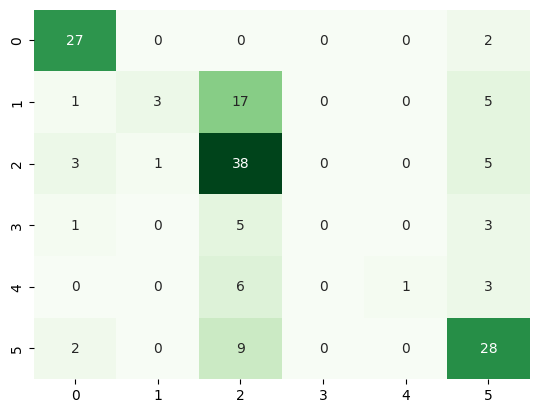

In [35]:
matrizRegresion = confusion_matrix(y_test, prediction)
sns.heatmap(matrizRegresion, annot=True, fmt='d', cmap='Greens', cbar=False)

In [36]:
df_rl = pd.DataFrame(data= zip(indexTest,prediction),
                                       columns=["ID","categoria"])
df_rl.to_csv("./prediction_rl.csv",index=False)

# RF

In [37]:
randomFores = RandomForestClassifier(n_estimators=100)
randomFores.fit(X_train, y_train)

RandomForestClassifier()

In [38]:
randomForesPrediction = randomFores.predict(X_test)

In [39]:
y_prediction = rf.predict(X_test)
matrixRF = confusion_matrix(y_test, y_predict)
sns.heatmap(matrixRF, annot=True, fmt='d', cmap='Reds', cbar=False)

NameError: name 'rf' is not defined

In [ ]:
df_rl = pd.DataFrame(data= zip(indexTest,prediction),
                                       columns=["ID","categoria"])
df_rl.to_csv("./prediction_RF.csv",index=False)

# LSTM

In [ ]:
# Obtener una lista de todos los títulos
titulos = df_train['titulo'].tolist()

# Crear una matriz (DataFrame) con palabras únicas como columnas
palabras_unicas = list(set(' '.join(titulos).split()))
matriz_frecuencia = pd.DataFrame(0, columns=palabras_unicas, index=titulos)

# Bucle para contar la frecuencia de palabras en cada título
for titulo in titulos:
    palabras = titulo.split()
    for palabra in palabras:
        matriz_frecuencia.at[titulo, palabra] += 1

# Imprimir la matriz de frecuencia
print(matriz_frecuencia)

In [ ]:
matriz_tf_idf = matriz_tf_idf[:800]
dataframe = pd.DataFrame(matriz_tf_idf['IDF'])
print(dataframe)

In [ ]:
x = dataframe.values
y = train_data['categoria'].values

numero_de_clases = len(np.unique(y))

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)

model = Sequential()
model.add(LSTM(128, input_shape=(x_train.shape[1], 1)))  
model.add(Dense(numero_de_clases, activation='softmax'))  

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))